<a href="https://colab.research.google.com/github/yunatural/Machine_Learning/blob/main/notebook0fdae1b397_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')

In [ ]:
#for setting up train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = red_wine['quality']
X = red_wine.drop(columns = 'quality')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 1024)              12288     
                                                                 
 dropout_64 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_64 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_81 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_65 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_65 (Bat  (None, 1024)             4096      
 chNormalization)                                    

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
)

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 1024)              12288     
                                                                 
 dropout_64 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_64 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_81 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_65 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_65 (Bat  (None, 1024)             4096      
 chNormalization)                                    

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/1000
5/5 [==============================] - 2s 80ms/step - loss: 34.1060 - val_loss: 30.5144
Epoch 2/1000
5/5 [==============================] - 0s 21ms/step - loss: 31.6494 - val_loss: 29.0789
Epoch 3/1000
5/5 [==============================] - 0s 21ms/step - loss: 30.0781 - val_loss: 27.4343
Epoch 4/1000
5/5 [==============================] - 0s 25ms/step - loss: 28.6550 - val_loss: 25.8723
Epoch 5/1000
5/5 [==============================] - 0s 21ms/step - loss: 26.9883 - val_loss: 24.1328
Epoch 6/1000
5/5 [==============================] - 0s 26ms/step - loss: 25.4792 - val_loss: 22.2674
Epoch 7/1000
5/5 [==============================] - 0s 22ms/step - loss: 23.6270 - val_loss: 20.2917
Epoch 8/1000
5/5 [==============================] - 0s 21ms/step - loss: 21.9882 - val_loss: 17.8625
Epoch 9/1000
5/5 [==============================] - 0s 22ms/step - loss: 20.0823 - val_loss: 16.2238
Epoch 10/1000
5/5 [==============================] - 0s 25ms/step - loss: 17.9487 - val_los

Minimum Validation Loss: 0.3760


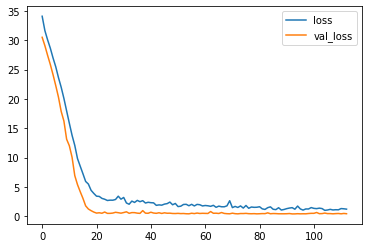

In [ ]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Minimum Validation Loss: 0.4830
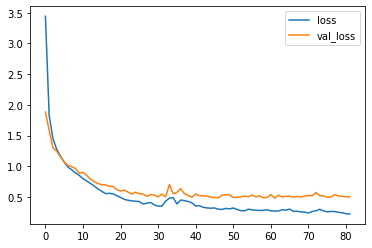

In [ ]:
#making the predictions
dnn_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#getting our results
dnn_mse = mean_squared_error(y_test,dnn_pred)

In [ ]:
#printing rmse
print("MSE =",(round(dnn_mse,2)))

MSE = 0.38


In [ ]:
#result table
from tabulate import tabulate

In [ ]:
#gathering the results
result_table = [['Deep Learning', round(dnn_mse,2)]]

#defining header names
col_names = ["Model", "MSE"]

#creating a results table
print(tabulate(result_table, headers=col_names))

Model            MSE
-------------  -----
Deep Learning   0.38


In [ ]:
''' <compile 옵션 변경>
1. optimizer='sgd',     loss='mse'로 실행 결과 
Minimum Validation Loss: 0.3994
Model            MSE
-------------  -----
Deep Learning    0.4

2.     optimizer='sgd', loss='mae' 로 실행 결과
 Minimum Validation Loss: 0.4830
Model            MSE
-------------  -----
Deep Learning   0.42

3. optimizer='adam', loss='mse' 으로 실행 결과
Minimum Validation Loss: 0.4830
Model            MSE
-------------  -----
Deep Learning    0.4~0.38

4.  optimizer='adam',  loss='mae'로 실행결과
Minimum Validation Loss: 0.4830
Model            MSE
-------------  -----
Deep Learning   0.51 '''

"compile 옵션 변경\n1. optimizer='sgd',     loss='mse'로 실행 결과 \nMinimum Validation Loss: 0.3994\nModel            MSE\n-------------  -----\nDeep Learning    0.4\n\n2.     optimizer='sgd', loss='mae' 로 실행 결과\n Minimum Validation Loss: 0.4830\nModel            MSE\n-------------  -----\nDeep Learning   0.42\n\n3. optimizer='adam', loss='mse' 으로 실행 결과\nMinimum Validation Loss: 0.4830\nModel            MSE\n-------------  -----\nDeep Learning    0.4~0.38\n\n4.  optimizer='adam',  loss='mae'로 실행결과\nMinimum Validation Loss: 0.4830\nModel            MSE\n-------------  -----\nDeep Learning   0.51 "

In [ ]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
red_wine = pd.read_csv('winequality-red.csv')

In [ ]:
target = red_wine['quality']
features = red_wine.drop('quality', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [ ]:
rms_error = []

for K in range (1, 76):
  model = neighbors.KNeighborsRegressor(n_neighbors = K)
  model.fit(X_train, Y_train)
  pred = model.predict (X_test)
  error = mean_squared_error(Y_test, pred, squared=False)
  rms_error.append(error)

In [ ]:
x = np.linspace(1,75, num = 75)
y = rms_error

In [ ]:
x.shape

(75,)

In [ ]:
len(y)

75

In [ ]:
y[0]

0.8696263565463043

In [ ]:
y[1]

0.7431983248097375

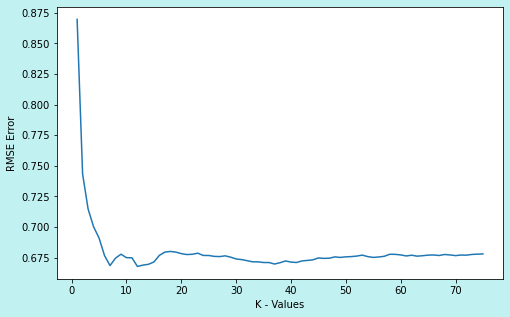

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), facecolor="#c1f1f1")
ax.plot(x, y)

#annot_optimum(x, y)
plt.xlabel('K - Values')
plt.ylabel('RMSE Error')
plt.show ( )

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

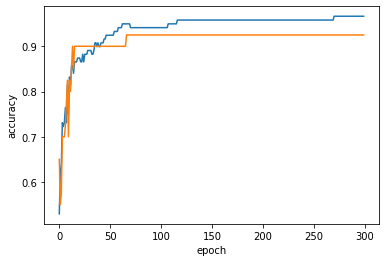

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log',  random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [ ]:
#gathering the results
result_table = [['Deep Learning', round(dnn_mse,2)],['KNN',round(y[3],2)],['YUNA',round(sc.score(train_scaled, train_target),2)]]

#defining header names
col_names = ["Model", "MSE"]

#creating a results table
print(tabulate(result_table, headers=col_names))

Model            MSE
-------------  -----
Deep Learning   0.38
KNN             0.7
YUNA            0.84


In [ ]:
'''mse,mae,sgd,adam 등을 변경하였을 때 수치의 변화를 알아보았다. forest부분이 이해가 잘 안간다.''' 

'mse,mae,sgd,adam 등을 변경하였을 때 수치의 변화를 알아보았다. forest부분이 이해가 잘 안간다.'

In [ ]:
from google.colab import files
files.download(.test.txt')

SyntaxError: ignored